## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
#to pull list from combined data
list(mouse_study_df.columns)

['Mouse ID',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)']

In [3]:
#checking the total number of mice
mice_count = mouse_study_df['Mouse ID'].nunique()
#mice_count_df = pd.DataFrame({'Number of Mice': [mice_count]})
mice_count

249

In [4]:
duplicate_mice = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
mouse_study_df[mouse_study_df['Mouse ID'] == duplicate_mice[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#in this case, we are telling the df that we do not want mouse id = g989 but we are still pulling the original df without 
mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count = mouse_study_df['Mouse ID'].nunique()
#mice_count_df = pd.DataFrame({'Number of Mice': [mice_count]})
mice_count

248

## Summary Statistics

In [9]:
var_mouse = np.var(mouse_study_df)
print(f"The population variance using the NumPy module is {var_mouse}")

The population variance using the NumPy module is Timepoint             198.541874
Tumor Volume (mm3)     79.420640
Metastatic Sites        1.298843
Age_months             51.553660
Weight (g)             15.476494
dtype: float64


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mice_summary_stats = mouse_study_df.groupby('Drug Regimen')
mean_tumor = mice_summary_stats['Tumor Volume (mm3)'].mean()
median_tumor = mice_summary_stats['Tumor Volume (mm3)'].median()
var_tumor = mice_summary_stats['Tumor Volume (mm3)'].var()
std_tumor = mice_summary_stats['Tumor Volume (mm3)'].std()
sem_tumor = mice_summary_stats['Tumor Volume (mm3)'].sem()


mice_summary_stats_table = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': var_tumor,
    'Tumor Volume Std. Dev.': std_tumor,
    'Tumor Volume Std. Err': sem_tumor
})
mice_summary_stats_table.sort_values(by='Drug Regimen', ascending=True)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mice_agg_summary_stats = mouse_study_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'std', 'var', 'sem']})

mice_agg_summary_stats

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#filter DataFrame down to only two needed columns 'Drug Regimen' and 'Mouse ID'

#mouse_and_drug = mouse_study_df.groupby('Drug Regimen').count()['Mouse ID']
mouse_and_drug = mouse_study_df['Drug Regimen'].value_counts()
mouse_and_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [13]:
mouse_and_drug.dtypes

dtype('int64')

In [14]:
#unique_mouse_id = mouse_and_drug.groupby('Drug Regimen')
#unique_id = unique_mouse_id['Drug Regime']

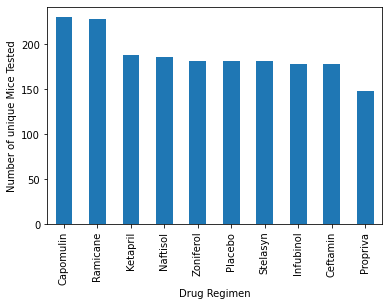

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_bar = mouse_and_drug.plot(kind='bar', figsize=(6,4))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of unique Mice Tested')
plt.show()

Text(0, 0.5, 'Number of Unique Mice Tested')

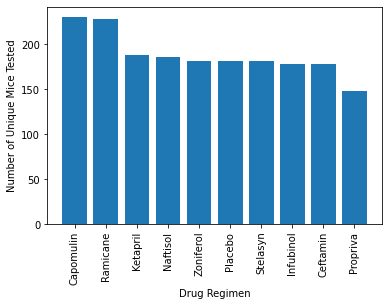

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mouse_and_drug = mouse_study_df['Drug Regimen'].value_counts()
#mouse_and_drug
x_axis = np.arange(len(mouse_and_drug))
# x_axis
# plt.figure(figsize=(20,3))
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, mouse_and_drug.index.values)
plt.bar(x_axis, mouse_and_drug, width=0.80)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
           
          

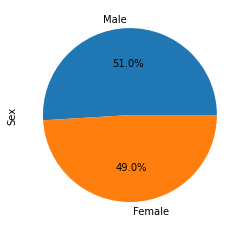

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_count = mouse_study_df['Sex'].value_counts()

pie_chart = mouse_gender_count.plot(kind='pie', autopct='%1.1f%%')
plt.show()


Text(0.5, 1.0, 'Sex')

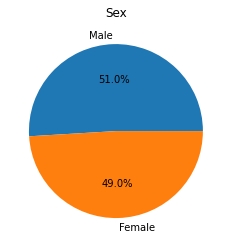

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender_count = mouse_study_df['Sex'].value_counts()

plt.pie(mouse_gender_count, labels=mouse_gender_count.index.values, autopct="%1.1f%%")
plt.title('Sex')


## Quartiles, Outliers and Boxplots

In [19]:
timepoint = pd.DataFrame(mouse_study_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
timepoint

,Mouse ID,Max Timepoint
0,b447,0
1,x226,0
2,f932,0
3,x336,0
4,l872,0
...,...,...
243,k894,45
244,l471,45
245,l509,45
246,i177,45


In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint = pd.DataFrame(mouse_study_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_2 = pd.merge(mouse_study_df, timepoint, on='Mouse ID', how='left')
merged_2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [21]:
#worked with classmate Alicia Ly
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] # Put treatments into a list for for loop (and later for plot labels)
tumor_vol_data = [] # Create empty list to fill with tumor vol data (for plotting)

for x in drugs:
    new = merged_2.loc[merged_2['Drug Regimen'] == x]
    final_volume = new.loc[new['Timepoint'] == new['Max Timepoint']]
    tumor_values = final_volume['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_values) 
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    #print(f'IQR for {x}: {iqr}')
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    #print(f'Lower Bound for {x}: {lower_bound}')
    #print(f'Upper Bound for {x}: {upper_bound}')
    outliers = (tumor_values.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                 (final_volume['Tumor Volume (mm3)'] <= lower_bound)])
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 416    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


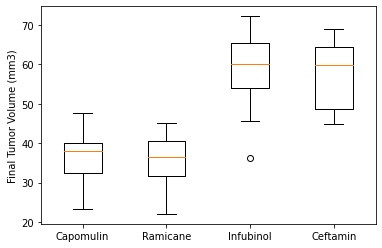

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

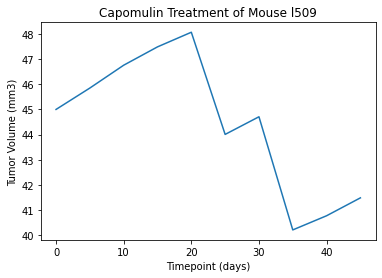

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'l509']

plt.plot(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()



In [24]:
capomulin_only = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']
average = capomulin_only.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
#print(average)
average_tumor_scatter = pd.merge(capomulin_only, average, on='Mouse ID')
#average_tumor_scatter
average_tumor_scatter = average_tumor_scatter.rename(columns={'Tumor Volume (mm3)_y': 'Average Tumor Volume', 
                                                             'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)'})
#average_tumor_scatter

In [25]:
no_duplicate = average_tumor_scatter[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
no_duplicate.head()

,Weight (g),Average Tumor Volume
0,22,41.963636
10,21,43.216925
18,17,36.509212
28,17,34.559143
38,21,40.083699


Text(0, 0.5, 'Average Tumor Volume (mm3)')

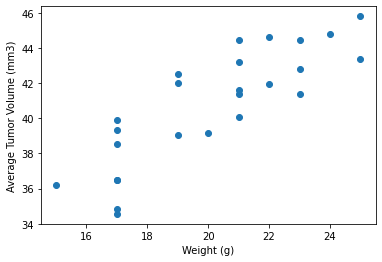

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Setting up the X and Y axis 
x_axis = no_duplicate['Weight (g)']
y_axis = no_duplicate['Average Tumor Volume']

# making a scatter plot
plt.scatter(x_axis, y_axis)

# giving the name to the x and y label
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


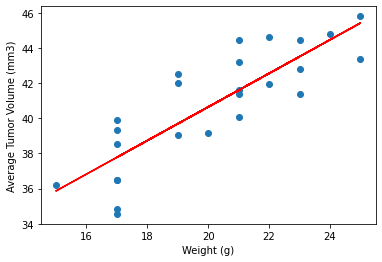

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = no_duplicate['Weight (g)']
y_axis = no_duplicate['Average Tumor Volume']

# giving the name to the x and y label
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# finding the correlation 
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
#the correlation coefficient between weight(g)and average tumor volume is 0.84


# go back up and add this -> scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
# the code below is to show the line equation
# plt.annotate(line_eq,(20,40),fontsize=10,color="red")
plt.show()